In [40]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [41]:
X = iris.drop('species', axis = 1)  # predictor
y = iris['species'] # response

In [42]:
from sklearn.preprocessing import LabelEncoder
classle = LabelEncoder()
y = classle.fit_transform(iris['species'].values) # factorization

# divide into train and test datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, 
                                                    random_state = 123, stratify = y)

# standardization
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)  # 이건 뭐지
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [43]:
# LDA(linear discriminate) fitting
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
cld = LinearDiscriminantAnalysis(store_covariance = True)  # variance 저장한다는 건가 저장한다는 건가 
cld.fit(X_train, y_train) # lda 적합
y_train_pred = cld.predict(X_train) 
y_test_pred = cld.predict(X_test)  

# get accuracies
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train, y_train_pred))
print('-----------------------------')
print(accuracy_score(y_test, y_test_pred))

0.9714285714285714
-----------------------------
0.9777777777777777


In [44]:
# confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_test_pred))  

[[15  0  0]
 [ 0 14  1]
 [ 0  0 15]]


In [45]:
# 분류될 확률
print(cld.predict_proba(X_test[:5]))  # test data의 처음 다섯 개의 obs가 각 범주로 분류될 확률

[[1.37493315e-32 5.86839618e-01 4.13160382e-01]
 [4.87880054e-42 4.08368248e-04 9.99591632e-01]
 [1.49908347e-19 9.99998532e-01 1.46841688e-06]
 [2.45317549e-24 9.97417042e-01 2.58295753e-03]
 [1.76506456e-50 1.80298359e-07 9.99999820e-01]]


In [46]:
print(cld.means_)  # sepal_length, sepal_width, petal_length, petal_width의 각 class별 평균 추정치 
print('-----------------------------------')
print(cld.xbar_)
print('-----------------------------------')
print(cld.covariance_) 
print('-----------------------------------')
print(cld.intercept_) 
print('-----------------------------------')
print(cld.coef_)

[[5.04285714 3.43428571 1.48857143 0.26571429]
 [5.89714286 2.76       4.22857143 1.3       ]
 [6.51714286 2.92857143 5.49142857 2.00285714]]
-----------------------------------
[5.81904762 3.04095238 3.73619048 1.18952381]
-----------------------------------
[[0.24214422 0.09216599 0.13204898 0.03123537]
 [0.09216599 0.11137415 0.05049796 0.03388844]
 [0.13204898 0.05049796 0.15023129 0.03387755]
 [0.03123537 0.03388844 0.03387755 0.04198639]]
-----------------------------------
[ -7.59067635  -5.09049202 -43.13606185]
-----------------------------------
[[  3.76019999  15.13062424 -17.99406267 -21.86481204]
 [ -0.91185753  -4.90401617   4.9041086    3.23562397]
 [ -2.84834246 -10.22660807  13.08995407  18.62918807]]


In [47]:
# QDA fitting
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
cqd = QuadraticDiscriminantAnalysis(store_covariance = True) 

cqd.fit(X_train, y_train)
y_train_pred = cqd.predict(X_train)
y_test_pred = cqd.predict(X_test)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_train, y_train_pred))
print('------------------------')
print(accuracy_score(y_test, y_test_pred))
# train의 예측력은 높아졌는데 test의 accuracy는 똑같음

0.9809523809523809
------------------------
0.9777777777777777


In [48]:
print(cqd.means_)
print('------------------------------')
print(cqd.covariance_)
print('------------------------------')  
# cqd에는 intercept_랑 coef_ 존재 ᄂᄂ

[[5.04285714 3.43428571 1.48857143 0.26571429]
 [5.89714286 2.76       4.22857143 1.3       ]
 [6.51714286 2.92857143 5.49142857 2.00285714]]
------------------------------
[array([[0.13605042, 0.11084034, 0.0105042 , 0.01239496],
       [0.11084034, 0.14467227, 0.01716807, 0.01444538],
       [0.0105042 , 0.01716807, 0.03280672, 0.0072437 ],
       [0.01239496, 0.01444538, 0.0072437 , 0.01290756]]), array([[0.22793277, 0.07635294, 0.13596639, 0.03647059],
       [0.07635294, 0.09364706, 0.07852941, 0.04058824],
       [0.13596639, 0.07852941, 0.18268908, 0.06      ],
       [0.03647059, 0.04058824, 0.06      , 0.03647059]]), array([[0.38381513, 0.09743697, 0.26132773, 0.04759664],
       [0.09743697, 0.10563025, 0.0602521 , 0.04962185],
       [0.26132773, 0.0602521 , 0.24845378, 0.03737815],
       [0.04759664, 0.04962185, 0.03737815, 0.08028571]])]
------------------------------


In [49]:
# confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_test_pred))

[[15  0  0]
 [ 0 14  1]
 [ 0  0 15]]


In [50]:
print(cqd.predict_proba(X_test[:5]))

[[1.30728298e-117 4.25364516e-001 5.74635484e-001]
 [4.80474602e-185 1.17558005e-003 9.98824420e-001]
 [1.12275433e-056 9.99994095e-001 5.90465247e-006]
 [1.46316743e-102 9.99459623e-001 5.40377069e-004]
 [9.87276194e-236 3.84799384e-005 9.99961520e-001]]


In [51]:
# multinomial naive bayes model 

import numpy as np
X = np.random.randint(5, size = (6, 20))  # entry가 1~5로 이루어진 6 X 20 행렬
                                          # sample size = 6, number of variables = 20
y = np.array([1, 2, 3, 4, 5, 6])  # class 가 6,,,, 
print(X)

[[4 3 2 1 4 1 2 2 3 3 0 1 2 2 0 2 4 3 0 2]
 [3 3 0 3 1 3 1 2 1 2 1 3 2 4 4 0 0 4 4 0]
 [2 3 3 1 3 2 3 2 0 4 4 2 2 4 1 2 3 0 4 3]
 [1 1 4 4 3 1 2 2 2 1 4 2 0 4 3 4 3 2 1 3]
 [0 4 4 1 0 3 4 4 4 2 4 3 4 0 1 4 3 1 0 3]
 [0 0 4 0 0 2 1 1 4 3 4 2 3 1 0 1 2 4 1 3]]


In [52]:
from sklearn.naive_bayes import MultinomialNB 
mnb = MultinomialNB()
mnb.fit(X, y)   
print(mnb.predict(X))

[1 2 3 4 5 6]


In [53]:
from sklearn.datasets import load_digits 
digits = load_digits()
print(digits.images.shape) # 1797명, 8 X 8 픽셀

(1797, 8, 8)


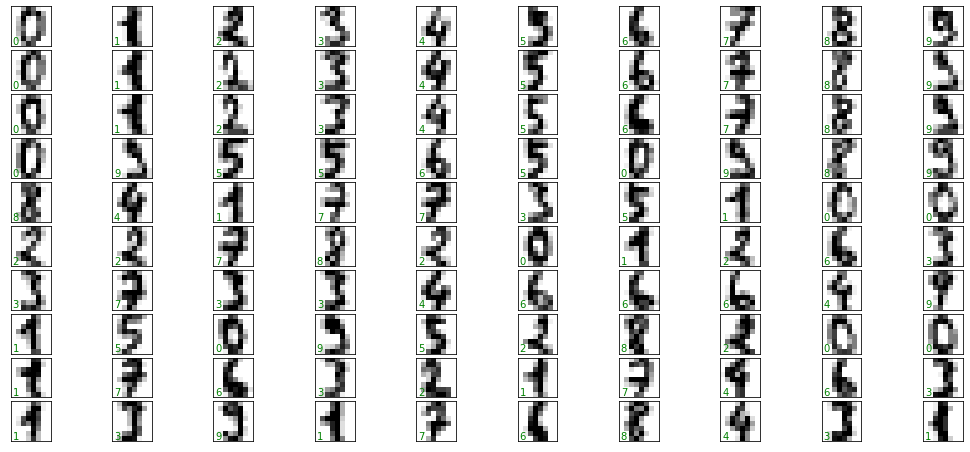

In [54]:
import matplotlib.pyplot as plt
fit, axes = plt.subplots(10, 10, figsize = (18, 8), subplot_kw = {'xticks':[], 'yticks':[]}, 
                         gridspec_kw = dict(hspace = 0.1, wspace = 0.1))
for i, ax in enumerate(axes.flat) :
  ax.imshow(digits.images[i], cmap = "binary", interpolation = 'nearest')
  ax.text(0.05, 0.05, str(digits.target[i]), transform = ax.transAxes, color = 'green') 

In [55]:
X = digits.data  # 8 X 8..
y = digits.target
print(X.shape)
print(y.shape)

(1797, 64)
(1797,)


In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# simple normal bayes model 
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_test_pred = gnb.predict(X_test)

# accuracy 
from sklearn.metrics import accuracy_score 
print(accuracy_score(y_test, y_test_pred))

0.8240740740740741


In [57]:
# confusion matrix
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, y_test_pred)
print(mat)

[[45  0  0  0  0  0  0  0  0  0]
 [ 0 46  0  0  0  0  0  0  6  0]
 [ 0  6 26  5  0  0  0  0 16  0]
 [ 0  0  0 46  0  0  0  1  6  1]
 [ 0  3  0  0 36  0  2  7  0  0]
 [ 0  1  0  2  0 51  1  2  0  0]
 [ 0  0  1  0  0  0 59  0  0  0]
 [ 0  0  0  0  1  0  0 52  0  0]
 [ 0  5  0  3  0  1  0  1 51  0]
 [ 0  1  0 14  1  0  0  3  5 33]]


Text(91.68, 0.5, 'True values')

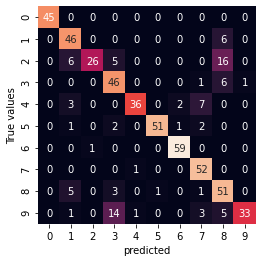

In [58]:
import seaborn as sns
sns.heatmap(mat, square = True, annot = True, cbar = False)
plt.xlabel('predicted')
plt.ylabel('True values')